# Lab2 Exercise

According to Lab matrials, we can do some exercise.

Firstly, you can change the linear function to a nonlinear function, like x^2, x^3...; Then using )(mini) Batch Gradient Descent or Stochastic Gradient Descend (SGD), to check the loss curve.

In [1]:
# import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import torch

Predict before training with BGD: 4.0 tensor(-60., grad_fn=<AddBackward0>)
iteration: 0, 	 loss: 1668.9549560546875, 	 weight: 6.443510055541992, 	 bias: -14.385859489440918
iteration: 5, 	 loss: 156.28013610839844, 	 weight: -0.9406428337097168, 	 bias: 0.888884425163269
iteration: 10, 	 loss: 65.41180419921875, 	 weight: 0.0563737154006958, 	 bias: 5.882997989654541
iteration: 15, 	 loss: 56.896141052246094, 	 weight: -0.06719154119491577, 	 bias: 7.521178722381592
iteration: 20, 	 loss: 56.003173828125, 	 weight: -0.048342082649469376, 	 bias: 8.057832717895508
iteration: 25, 	 loss: 55.90764617919922, 	 weight: -0.04998548701405525, 	 bias: 8.233728408813477
iteration: 30, 	 loss: 55.897403717041016, 	 weight: -0.049493350088596344, 	 bias: 8.291369438171387
iteration: 35, 	 loss: 55.896297454833984, 	 weight: -0.049467962235212326, 	 bias: 8.310259819030762
iteration: 40, 	 loss: 55.896183013916016, 	 weight: -0.04944171383976936, 	 bias: 8.316450119018555
iteration: 45, 	 loss: 5

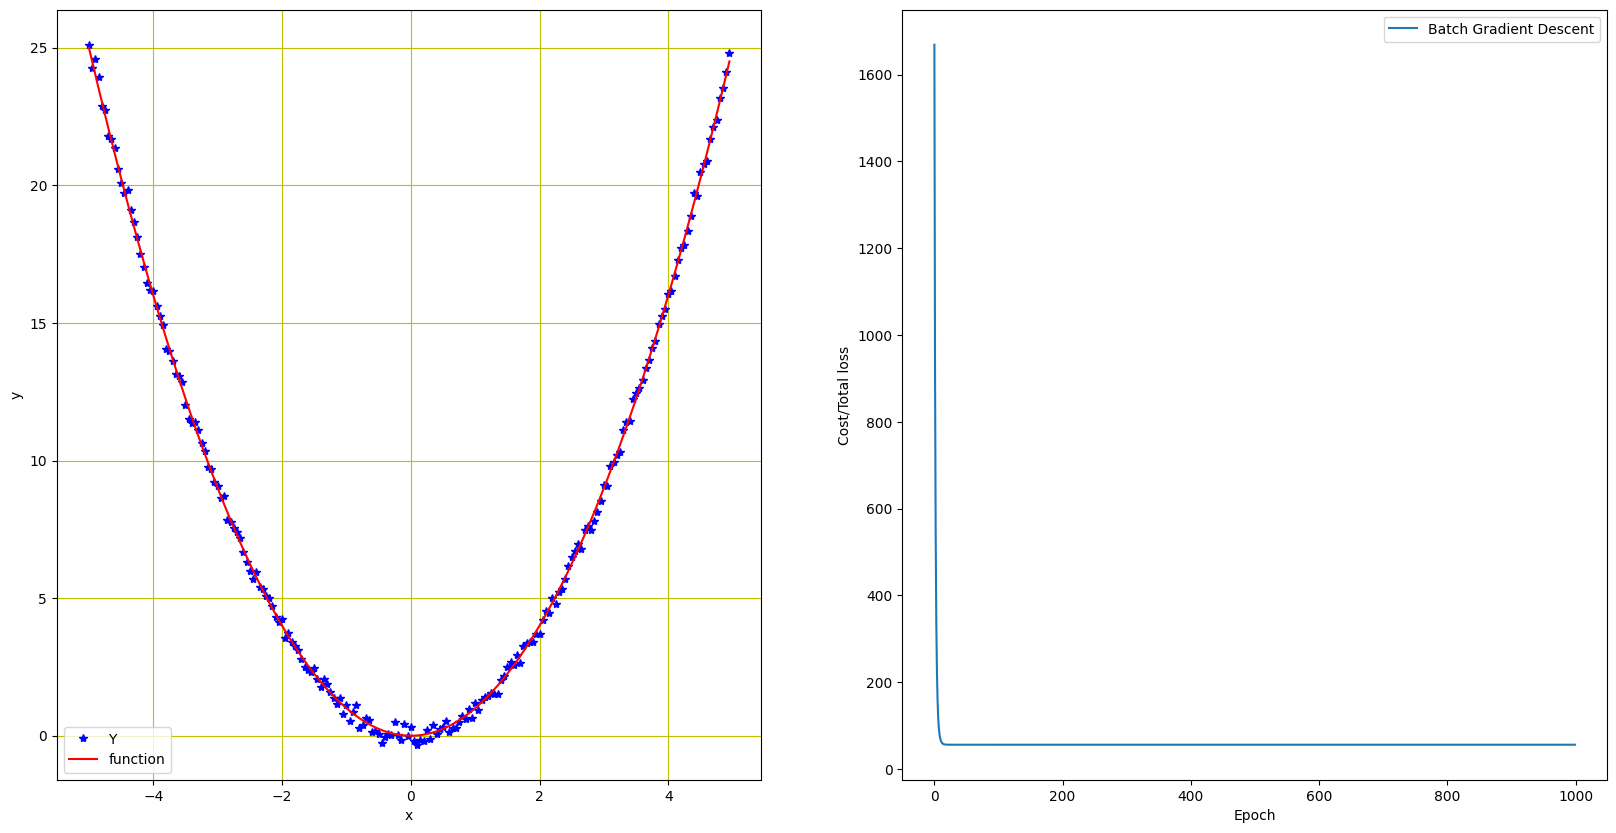

In [2]:
# produce the data point with linear function
X = torch.arange(-5, 5, 0.05).view(-1, 1)
func = X**2
# Gaussian noise is added to create the variable Y
Y = func + 0.2 * torch.randn(X.size())

# plot and visualize the data points
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(X, Y, 'b*', label='Y')
ax1.plot(X, func, 'r', label='function')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid('True', color='y')

# define the forward function
def forward(x):
    return w * x + b

# define loss function with Mean Square Error (MSE)
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

#  initial parameters w and b
w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)

#  other parameters
step_size = 0.1
loss_BGD = []
n_iter = 1000

# Printing initial predictions
print('Predict before training with BGD:',4.0,forward(4.0))

for i in range (n_iter):
    # making predictions with forward pass
    Y_pred = forward(X)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    # storing the calculated loss in a list
    loss_BGD.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    b.data = b.data - step_size * b.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    b.grad.data.zero_()
    # priting some values for understanding
    if i % 5 == 0:
        print('iteration: {}, \t loss: {}, \t weight: {}, \t bias: {}'.format(i, loss.item(), w.item(), b.item()))

# Predicting y after updating w
print('Predict after training with BGD:', 4.0, forward(4.0))

# plot the figure (loss_BGD)
plt.plot(loss_BGD, label="Batch Gradient Descent")
plt.xlabel('Epoch')
plt.ylabel('Cost/Total loss')
plt.legend()
plt.show()



Secondly, search the learnig rate between (0,1), and find the best learning rate for the **5-2**. Use the MNIST dataset.

In [3]:
# import necessary libraries

import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms


In [4]:
# define hyperparameters
input_size = 28 * 28  # MNIST image size (flattened)

# number of nodes at hidden layer
hidden_size = 500

# number of output classes discrete range [0,9]
num_classes = 10

# number of times which the entire dataset is passed throughout the model
num_epochs = 30

# the size of input data took for one iteration
batch_size = 1000

# # learning rate
# lr = 1e-3

In [5]:
# Download MNIST data
train_data = datasets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = datasets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor(), download = True)

# Split dataset with DataLoader, train dataset and test dataset
train_gen = torch.utils.data.DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_gen = torch.utils.data.DataLoader(dataset = test_data, batch_size = batch_size, shuffle = False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 39.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.98MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.5MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.54MB/s]


In [6]:
# Use GPU, if the GPU is available, otherwise use the CPU.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [7]:
# Define neural network model
class Net(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()  # Relu activation function, you can also use others like Tanh, Sigmold, etc.
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self,x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

# Build the model of neural network
net = Net(input_size, hidden_size, num_classes)
net.to(device)
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


Searching for the best learning rate...

Training with learning rate: 0.00010

Training with learning rate: 0.00110

Training with learning rate: 0.00210

Training with learning rate: 0.00310

Training with learning rate: 0.00410

Training with learning rate: 0.00510

Training with learning rate: 0.00610

Training with learning rate: 0.00710

Training with learning rate: 0.00810

Training with learning rate: 0.00910

Best learning rate found: 0.00610 with final test accuracy: 98.37%


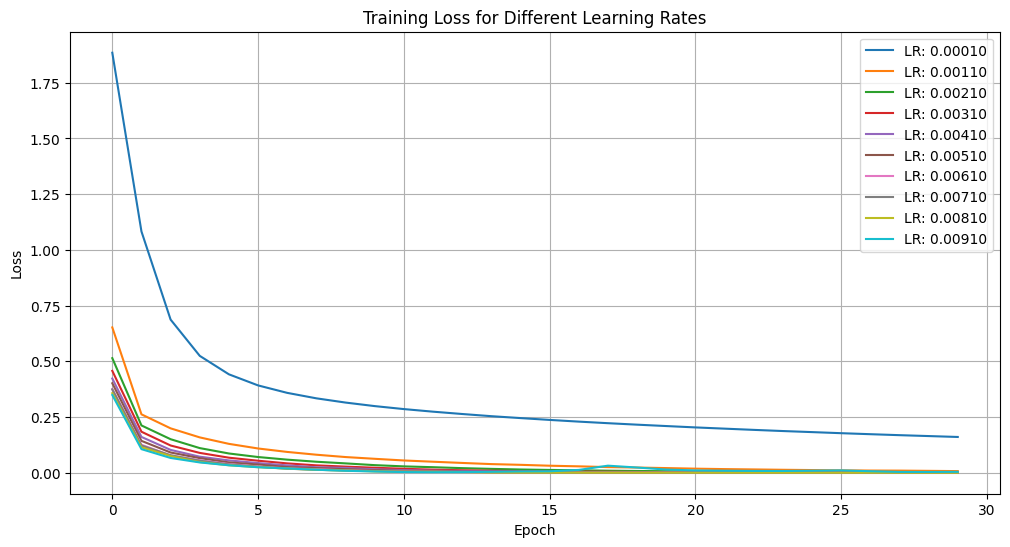

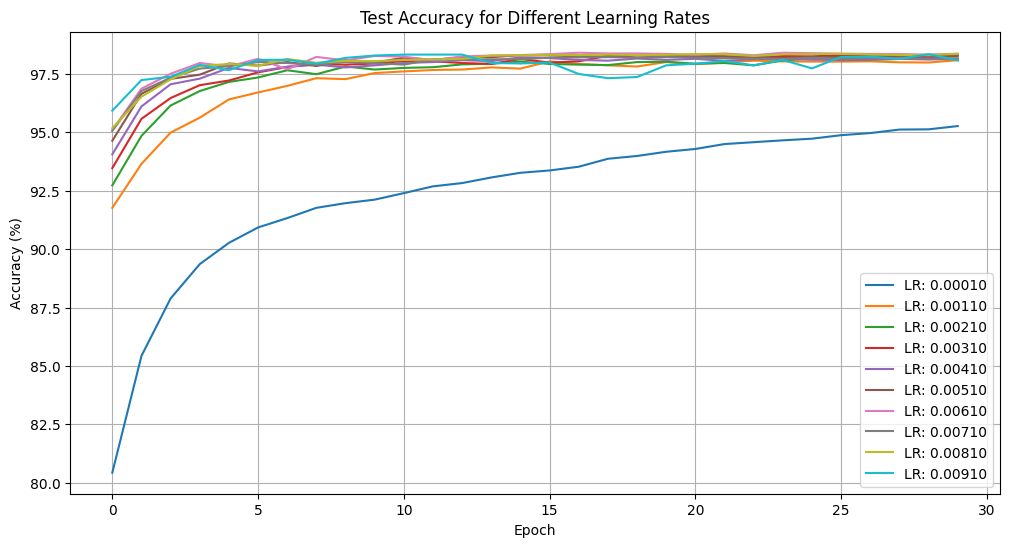

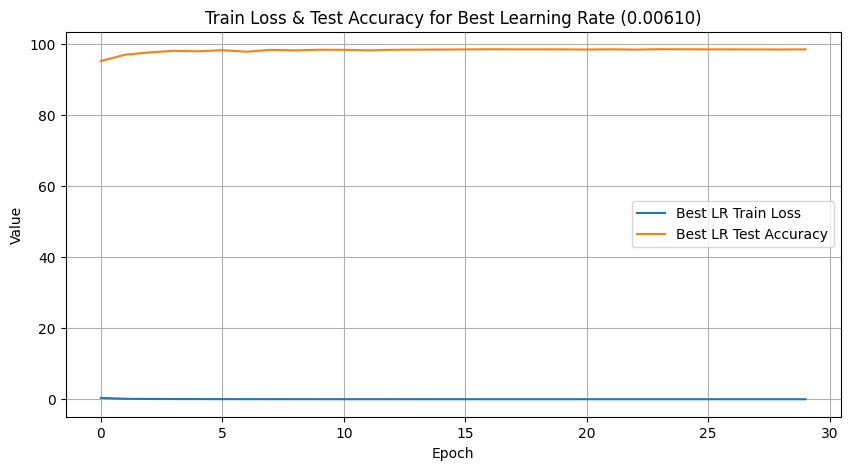

In [8]:
lr_list = np.arange(0.0001, 0.01, 0.001)

# Lists to store metrics for plotting
all_train_losses = []
all_test_accuracies = []

best_lr = 0
max_test_accuracy = 0
best_lr_train_losses = []
best_lr_test_accuracies = []

print("Searching for the best learning rate...")

for lr in lr_list:
    print(f"\nTraining with learning rate: {lr:.5f}")
    # Re-initialize the model for each learning rate to ensure a fresh start
    net = Net(input_size, hidden_size, num_classes).to(device)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)

    train_losses_per_lr = []
    test_accuracies_per_lr = []

    for epoch in range(num_epochs):
        # Training phase
        net.train() # Set model to training mode
        correct_train = 0
        total_train = 0
        total_loss = 0

        for i, (images, labels) in enumerate(train_gen):
            images = images.reshape(-1, input_size).to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = net(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        avg_train_loss = total_loss / len(train_gen)
        train_accuracy = 100 * correct_train / total_train
        train_losses_per_lr.append(avg_train_loss)

        # Evaluation phase
        net.eval() # Set model to evaluation mode
        with torch.no_grad():
            correct_test = 0
            total_test = 0
            for images, labels in test_gen:
                images = images.reshape(-1, input_size).to(device)
                labels = labels.to(device)
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()
            test_accuracy = 100 * correct_test / total_test
            test_accuracies_per_lr.append(test_accuracy)

        # Optional: Print epoch-wise results for each LR
        # if (epoch + 1) % 5 == 0 or epoch == num_epochs - 1:
        #     print(f'  Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Test Acc: {test_accuracy:.2f}%')

    all_train_losses.append(train_losses_per_lr)
    all_test_accuracies.append(test_accuracies_per_lr)

    final_test_accuracy_for_lr = test_accuracies_per_lr[-1]
    if final_test_accuracy_for_lr > max_test_accuracy:
        max_test_accuracy = final_test_accuracy_for_lr
        best_lr = lr
        best_lr_train_losses = train_losses_per_lr
        best_lr_test_accuracies = test_accuracies_per_lr


print(f"\nBest learning rate found: {best_lr:.5f} with final test accuracy: {max_test_accuracy:.2f}%")

# Plotting training curves of different learning rates (loss)
plt.figure(figsize=(12, 6))
for i, lr_val in enumerate(lr_list):
    plt.plot(all_train_losses[i], label=f'LR: {lr_val:.5f}')
plt.title('Training Loss for Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting training curves of different learning rates (test accuracy)
plt.figure(figsize=(12, 6))
for i, lr_val in enumerate(lr_list):
    plt.plot(all_test_accuracies[i], label=f'LR: {lr_val:.5f}')
plt.title('Test Accuracy for Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

# Plot train loss and test accuracy for the best learning rate
plt.figure(figsize=(10, 5))
plt.plot(best_lr_train_losses, label='Best LR Train Loss')
plt.plot(best_lr_test_accuracies, label='Best LR Test Accuracy')
plt.title(f'Train Loss & Test Accuracy for Best Learning Rate ({best_lr:.5f})')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

Lastly, using the Fashion MNIST dataset, how can you improve the accuracy?
Please explore any method to achieve a much higher accuracy. For example, you can change the network model by add more layers, tune hypaerparameters, or any other ideas to obtain a better results.


In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [18]:
# Light augmentation helps generalization (optional but usually improves)
train_tfms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.2),
    transforms.RandomCrop(28, padding=2),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

test_tfms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [19]:
train_data = torchvision.datasets.FashionMNIST(root="./data", train=True, download=True, transform=train_tfms)
test_data  = torchvision.datasets.FashionMNIST(root="./data", train=False, download=True, transform=test_tfms)

batch_size = 128
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)

**Defining and training a better model**

In [20]:
class FashionCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1   = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2   = nn.BatchNorm2d(64)
        self.pool  = nn.MaxPool2d(2, 2)
        self.drop  = nn.Dropout(0.25)

        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # 28x28 -> 14x14
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # 14x14 -> 7x7
        x = self.drop(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.drop(x)
        x = self.fc2(x)
        return x

model = FashionCNN().to(device)

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)  # weight_decay = L2 regularization
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)  # optional, but helpful

def evaluate(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            logits = model(x)
            pred = logits.argmax(dim=1)
            correct += (pred == y).sum().item()
            total += y.size(0)
    return 100.0 * correct / total

num_epochs = 15
train_losses = []
test_accs = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for x, y in train_loader:
        x, y = x.to(device), y.to(device)

        optimizer.zero_grad()
        logits = model(x)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    scheduler.step()  # optional

    avg_loss = running_loss / len(train_loader)
    acc = evaluate(model, test_loader)

    train_losses.append(avg_loss)
    test_accs.append(acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] | Loss: {avg_loss:.4f} | Test Acc: {acc:.2f}%")

Epoch [1/15] | Loss: 0.5987 | Test Acc: 86.09%
Epoch [2/15] | Loss: 0.4266 | Test Acc: 88.67%
Epoch [3/15] | Loss: 0.3873 | Test Acc: 88.75%
Epoch [4/15] | Loss: 0.3624 | Test Acc: 89.58%
Epoch [5/15] | Loss: 0.3474 | Test Acc: 89.58%
Epoch [6/15] | Loss: 0.3143 | Test Acc: 90.65%
Epoch [7/15] | Loss: 0.3060 | Test Acc: 90.63%
Epoch [8/15] | Loss: 0.2980 | Test Acc: 90.51%
Epoch [9/15] | Loss: 0.2956 | Test Acc: 90.75%
Epoch [10/15] | Loss: 0.2874 | Test Acc: 90.96%
Epoch [11/15] | Loss: 0.2729 | Test Acc: 91.64%
Epoch [12/15] | Loss: 0.2689 | Test Acc: 91.57%
Epoch [13/15] | Loss: 0.2643 | Test Acc: 91.85%
Epoch [14/15] | Loss: 0.2645 | Test Acc: 91.81%
Epoch [15/15] | Loss: 0.2649 | Test Acc: 91.80%


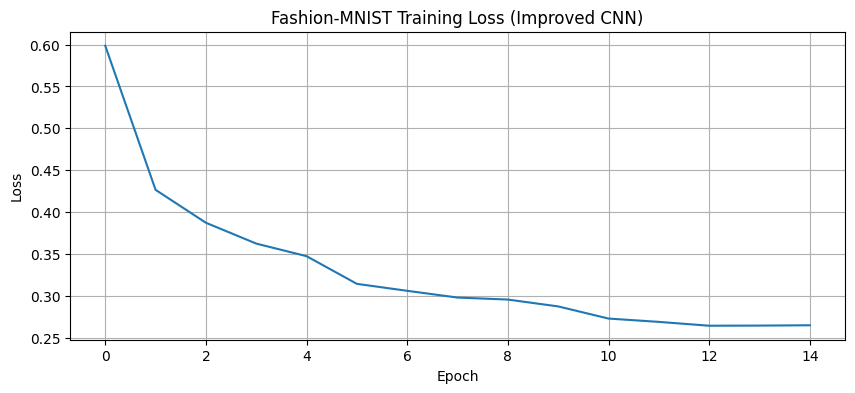

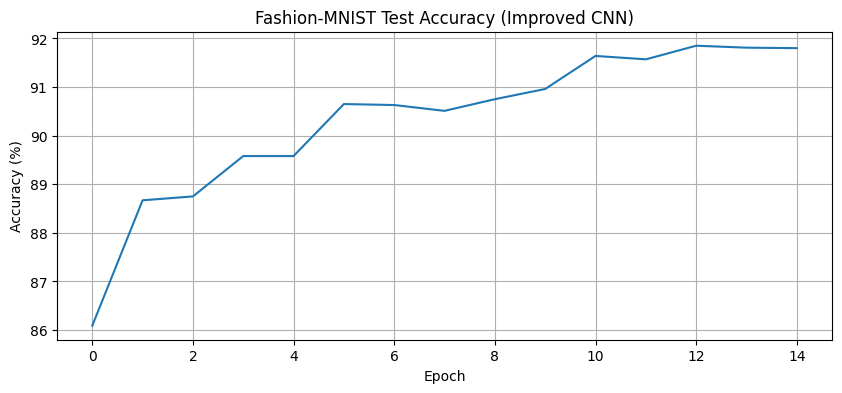

In [22]:
plt.figure(figsize=(10,4))
plt.plot(train_losses)
plt.title("Fashion-MNIST Training Loss (Improved CNN)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(test_accs)
plt.title("Fashion-MNIST Test Accuracy (Improved CNN)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()
